In [2]:
# import packages

import numpy as np
import pandas as pd
from math import log2

import plotly.plotly as py
import matplotlib.pyplot as plt



# get whole gene disease table

In [4]:
# Read original gene-disease dataset
Gene_Disease = pd.DataFrame.from_csv("all_gene_disease_associations.tsv", sep="\t")
Gene_Disease.head(2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
geneId,,,,,,,,,,,,,,,
1,A1BG,0.857,0.172,C0001418,Adenocarcinoma,group,C04,Neoplastic Process,0.01,NaN,2008.0,2008.0,1,0,LHGDN
1,A1BG,0.857,0.172,C0002736,Amyotrophic Lateral Sclerosis,disease,C10;C18,Disease or Syndrome,0.01,1.0,2009.0,2009.0,1,0,BEFREE


In [7]:
# understand the gene and disease distribution, and check one gene index existance
Gene_Disease_gene_list = Gene_Disease['geneSymbol'].values.tolist()
Gene_Disease_gene_list = list(set(Gene_Disease_gene_list))
print('A1BG index: ',Gene_Disease_gene_list.index('A1BG'))
print('Gene Length: ',len(Gene_Disease_gene_list))

Gene_Disease_list = Gene_Disease['diseaseName'].values.tolist()
Gene_Disease_list = list(set(Gene_Disease_list))
print('Disease amount: ',len(Gene_Disease_list))

A1BG index:  4468
Gene Length:  17545
Disease amount:  24166


In [8]:
# Deal with gene-disease dataset and rule out irrelevant information
Gene_Disease = Gene_Disease[['geneSymbol','diseaseName']]
Gene_Disease['count'] = 1

Gene_Disease_pivot = pd.pivot_table(Gene_Disease,values = 'count', index='diseaseName',
                                 columns='geneSymbol', aggfunc=np.sum,fill_value=0)
Gene_Disease_pivot = Gene_Disease_pivot.T
Gene_Disease_pivot.to_csv('Gene_Disease_Enrichment.csv')
Gene_Disease_pivot.head(5)

diseaseName,1-5 finger complete cutaneous syndactyly,1-5 finger syndactyly,1-5 toe syndactyly,11 pairs of ribs,11-Beta-Hydroxysteroid Dehydrogenase Type 1 Deficiency,11-Beta-hydroxylase deficiency,12q14 microdeletion syndrome,14q12 microdeletion syndrome,15q24 Microdeletion,16q24.3 microdeletion syndrome,...,"von Willebrand Disease, Type 2N","von Willebrand Disease, Type 3",von Willebrand disease type 2M,"von Willebrand disease, type IIC","von Willebrand disease, type IID",von Willebrand's factor (lab test),walking pain,wegener's granuloma,winter depression,x-ray of toe: polydactyly
geneSymbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Read the disease table from what we just saved
Gene_Disease_pivot = pd.read_csv('Gene_Disease_Enrichment.csv')
Gene_Disease_pivot.head(2)
Gene_Disease_pivot = Gene_Disease_pivot.set_index('geneSymbol')

In [11]:
# calculate disease enrichment
Gene_Disease_pivot.loc['all_sum'] = Gene_Disease_pivot.sum()
Gene_Disease_pivot.loc['Enrichment'] = Gene_Disease_pivot.loc['all_sum']/len(Gene_Disease_gene_list)
Gene_Disease_Enrichment = Gene_Disease_pivot
Gene_Disease_Enrichment = Gene_Disease_Enrichment.sort_values(by='Enrichment', ascending=False, axis=1)
Gene_Disease_Enrichment.tail(3)

,Malignant neoplasm of breast,Breast Carcinoma,Carcinogenesis,Neoplasm Metastasis,Liver carcinoma,Colorectal Cancer,Malignant neoplasm of prostate,Prostate carcinoma,Colorectal Carcinoma,Intellectual Disability,...,Induced vaginal delivery,Infant Gynecomastia,"Infant, Extremely Low Birth Weight","Infant, Premature, Diseases","Infant, Very Low Birth Weight",Infantile Diarrhea,Infantile GM 2 gangliosidosis,Infantile atopic dermatitis,Infantile encephalopathy AND lactic acidosis,x-ray of toe: polydactyly
geneSymbol,,,,,,,,,,,,,,,,,,,,,
ZZZ3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
all_sum,5053.000000,4962.000000,4064.000000,3919.000000,3592.000000,3298.000000,3238.000000,3144.000000,2931.000000,2502.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Enrichment,0.288002,0.282816,0.231633,0.223368,0.204731,0.187974,0.184554,0.179196,0.167056,0.142605,...,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057


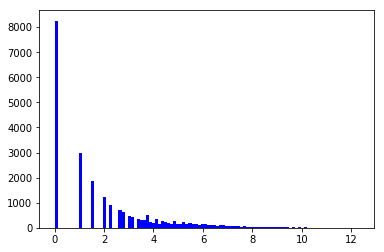

In [12]:
# get disease distribution
plt.hist(np.log2(pd.DataFrame(Gene_Disease_Enrichment.loc['all_sum']).T), bins = 100, color = 'b')
plt.show()

# Get Lupus and Lupus's oevrlap disease table

In [16]:
# define function used to search disease name contains a key word\

def find_certain_disease(disease_name , List):
    Aim_disease_list = []
    for disease in Gene_Disease_list:
        if disease_name.lower() in disease.lower():
            Aim_disease_list.append(disease)
    return(Aim_disease_list)



In [17]:
Lupus_list = find_certain_disease('Lupus' , Gene_Disease_list)
print('# of Lupus: ', len(Lupus_list))

#-------

Autoimmune_thyroid_list = find_certain_disease('Autoimmune thyroid' , Gene_Disease_list)
print('# of Autoimmune thyroid disease: ', len(Autoimmune_thyroid_list))

Celiac_list = find_certain_disease('Celiac disease' , Gene_Disease_list)
print('# of Celiac disease: ', len(Celiac_list))

Myasthenia_gravis_list = find_certain_disease('Myasthenia gravis' , Gene_Disease_list)
print('# of Myasthenia gravis disease: ', len(Myasthenia_gravis_list))

Antiphospholipid_list = find_certain_disease('Antiphospholipid' , Gene_Disease_list)
print('# of Antiphospholipid syndrome: ', len(Antiphospholipid_list))

Rheumatoid_arthritis_list = find_certain_disease('Rheumatoid arthritis' , Gene_Disease_list)
print('# of Rheumatoid arthritis: ', len(Rheumatoid_arthritis_list))

Polymyositis_list = find_certain_disease('Polymyositis' , Gene_Disease_list)
print('# of Polymyositis: ', len(Polymyositis_list))

Dermatomyositis_list = find_certain_disease('Dermatomyositis' , Gene_Disease_list)
print('# of Dermatomyositis: ', len(Dermatomyositis_list))

Scleroderma_list = find_certain_disease('Scleroderma' , Gene_Disease_list)
print('# of Scleroderma: ', len(Scleroderma_list))

Raynaud_list = find_certain_disease('Raynaud' , Gene_Disease_list)
print('# of Raynaud’s Syndrome: ', len(Raynaud_list))

Sjogren_list = find_certain_disease('Sjogren' , Gene_Disease_list)
print('# of Sjögren’s syndrome: ', len(Sjogren_list))

# of Lupus:  27
# of Autoimmune thyroid disease:  2
# of Celiac disease:  4
# of Myasthenia gravis disease:  3
# of Antiphospholipid syndrome:  5
# of Rheumatoid arthritis:  8
# of Polymyositis:  3
# of Dermatomyositis:  5
# of Scleroderma:  9
# of Raynaud’s Syndrome:  3
# of Sjögren’s syndrome:  3


In [18]:
# get all lupus related disease list
Lupus_overlap_disease_list = set(Lupus_list + Autoimmune_thyroid_list + Celiac_list 
                              + Myasthenia_gravis_list + Antiphospholipid_list 
                              + Rheumatoid_arthritis_list + Polymyositis_list 
                              + Dermatomyositis_list + Scleroderma_list + Raynaud_list + Sjogren_list)



Lupus_overlap_disease_list = list(Lupus_overlap_disease_list)
Lupus_overlap_disease_list.remove('Marinesco-Sjogren syndrome')
Lupus_overlap_disease_list.remove('Sjogren-Larsson Syndrome')

print('Number of diseases that realted to Lupus:',len(Lupus_overlap_disease_list))

Number of diseases that realted to Lupus: 70


In [23]:
# get lupus related diseases enrichment in whole gene

Lupus_overlap_disease_Enrichment = Gene_Disease_Enrichment[Lupus_overlap_disease_list]

Lupus_overlap_disease = Lupus_overlap_disease_Enrichment.drop(index='Enrichment')
print('Lupus oevrlap disease table shape:',Lupus_overlap_disease.shape)

# save to csv
Lupus_overlap_disease_Enrichment = Lupus_overlap_disease_Enrichment.sort_values( by='all_sum',axis = 1,ascending = False)
#Lupus_overlap_disease_Enrichment.to_csv('Lupus_overlap_disease_Enrichment.csv')

Lupus_overlap_disease_Enrichment.tail(5)

Lupus oevrlap disease table shape: (17546, 70)


,Rheumatoid Arthritis,"Lupus Erythematosus, Systemic",Systemic Scleroderma,Celiac Disease,"Lupus Erythematosus, Discoid",Lupus Erythematosus,Lupus Vulgaris,Sjogren's Syndrome,Lupus Nephritis,Scleroderma,...,"CELIAC DISEASE, SUSCEPTIBILITY TO, 4","Lupus erythematosus, subacute",Lupus Flare,CHILBLAIN LUPUS 2,Bullous systemic lupus erythematosus,"SYSTEMIC LUPUS ERYTHEMATOSUS, SUSCEPTIBILITY TO, 11",Lupus erythematosus overlap syndrome,"SYSTEMIC LUPUS ERYTHEMATOSUS, SUSCEPTIBILITY TO, 10 (finding)",Enteroviral dermatomyositis syndrome,"RHEUMATOID ARTHRITIS, SUSCEPTIBILITY TO"
geneSymbol,,,,,,,,,,,,,,,,,,,,,
ZYX,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZZEF1,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZZZ3,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
all_sum,1832.000000,1112.00000,561.000000,311.000000,308.000000,303.00000,283.00000,259.000000,209.000000,178.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Enrichment,0.104417,0.06338,0.031975,0.017726,0.017555,0.01727,0.01613,0.014762,0.011912,0.010145,...,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057


# Disease Enrichment in picked genes

### Top genes on PC1 positive side

In [24]:
# get gene list
IRI_Std_PCA_Abs00133 = pd.read_csv('IRI_Std_PCA_Abs00133.csv')
IRI_Std_PCA_Abs00133 = IRI_Std_PCA_Abs00133.sort_values(by=['Eigenvector_value'], ascending = False)

IRI_Std_PCA_Abs00133_gene_list = IRI_Std_PCA_Abs00133['Unnamed: 0'].values.tolist()
#IRI_Std_PCA_Abs00133_gene_list.append('Enrichment')

print('IRI Std PC1 Absoule>0.0133:',len(IRI_Std_PCA_Abs00133_gene_list))
IRI_Std_PCA_Abs00133.head(2)

IRI Std PC1 Absoule>0.0133: 114


,Unnamed: 0,Eigenvector_value,L140_IRI,L149_IRI,L062_IRI,N048_IRI,N068_IRI,N090_IRI,N098_IRI,L005_IRI,L027_IRI,L031_IRI,L072_IRI,L074_IRI,L078_IRI,L102_IRI,L115_IRI,L133_IRI,L137_IRI
62,TIMM44,0.013480,2.126599,1.611989,0.961640,0.063920,0.258456,1.258204,0.949993,-0.837512,-0.814065,-1.086407,-0.316479,-0.888346,-0.944855,-0.739470,-0.957801,-0.707433,0.061566
64,ISCU,0.013474,2.300250,1.428720,0.854145,0.453468,-0.193545,1.262225,0.946755,-0.955687,-0.824708,-1.080744,-0.298904,-0.700410,-0.922535,-0.808016,-0.971218,-0.557371,0.067575


In [25]:
# get picked gene disease table
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment = Gene_Disease_pivot.loc[IRI_Std_PCA_Abs00133_gene_list]
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment.dropna()
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment[(IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment.T != 0.000000).any()]
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment.loc[:, (IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment != 0).any(axis=0)]

# get gene list after overlap
IRI_Std_PCA_Abs00133_N0G_N0D_gene_list = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment.index.values.tolist()
print(len(IRI_Std_PCA_Abs00133_N0G_N0D_gene_list),'of gene out of 114 has disease')

# get the whole locate index, Enrichment and all_sum
IRI_Std_PCA_Abs00133_N0G_N0D_gene_list.append('Enrichment')
IRI_Std_PCA_Abs00133_N0G_N0D_gene_list.append('all_sum')

# get disease list after overlap
IRI_Std_PCA_Abs00133_N0D_Disease_list = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment.columns.values
print('# of disease in picked genes:',len(IRI_Std_PCA_Abs00133_N0D_Disease_list))


IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z = Gene_Disease_Enrichment.loc[IRI_Std_PCA_Abs00133_N0G_N0D_gene_list]
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z[IRI_Std_PCA_Abs00133_N0D_Disease_list]

IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.tail(3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



94 of gene out of 114 has disease
# of disease in picked genes: 1922


,22q11 Deletion Syndrome,"3-@METHYLGLUTACONIC ACIDURIA, TYPE V",3-Methylglutaconic aciduria type 2,3-Methylglutaric aciduria,3C syndrome,ADAMS-OLIVER SYNDROME 4,AMYOTROPHIC LATERAL SCLEROSIS 1,"ANEURYSM, INTRACRANIAL BERRY, 1 (disorder)",AORTIC VALVE DISEASE 2,ATRIOVENTRICULAR CANAL DEFECT,...,oligodendroglioma,ovarian neoplasm,ovarian serous tumor,periodic paralysis (finding),polyps,refractory CML,social stress,spasmus nutans,"stage, gastric cancer",tumor vasculature
geneSymbol,,,,,,,,,,,,,,,,,,,,,
CHFR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Enrichment,0.001197,0.000171,0.000969,0.000114,0.000228,0.000057,0.005301,0.000228,0.00114,0.001425,...,0.010373,0.053406,0.000342,0.000855,0.016187,0.000285,0.000855,0.000342,0.001083,0.007296
all_sum,21.000000,3.000000,17.000000,2.000000,4.000000,1.000000,93.000000,4.000000,20.00000,25.000000,...,182.000000,937.000000,6.000000,15.000000,284.000000,5.000000,15.000000,6.000000,19.000000,128.000000


In [26]:
#calculate enrichment in picked genes
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['self_sum'] = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.sum(axis=0)-IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['Enrichment']-IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['all_sum']
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['z_score'] = (IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['self_sum']-IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['Enrichment']*(len(IRI_Std_PCA_Abs00133_N0G_N0D_gene_list)-2))/(IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['Enrichment']*(len(IRI_Std_PCA_Abs00133_N0G_N0D_gene_list)-2))

#drop diseases with # of genes out of 26,000 less than 4
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc[:,IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.loc['all_sum'] > 3]

#chose enriched disease, Z_score>1
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D_Z = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D.loc[:,IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D.loc['z_score'] > 1]

#Reshape sort the table by z_score
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D_Z = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D_Z.sort_values(by = 'z_score', ascending=False, axis=1)

print(IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D.shape)
print(IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D_Z.shape)
IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_D_Z.tail(5)

# save to csv for further use
#IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.to_csv('IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.csv')
#IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_N1.to_csv('IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z_N1.csv')



(98, 1788)
(98, 1094)


,Dental enamel pits,Uterine Angiosarcoma,"Spontaneous, recurrent epistaxis",Spider veins of the lip,Congenital Osteopetrosis,Hematemesis,Chylothorax,"Severe Combined Immunodeficiency, Autosomal Recessive, T Cell Negative, B Cell Positive, NK Cell Positive",Chronic non-A non-B hepatitis,"Alzheimer disease, familial, type 3",...,Small for gestational age (disorder),"Osteoarthritis, Knee",Low Birth Weights,Childhood Medulloblastoma,Intrauterine retardation,Childhood Glioblastoma,Vomiting,Long narrow head,Myelodysplasia,AMYOTROPHIC LATERAL SCLEROSIS 1
geneSymbol,,,,,,,,,,,,,,,,,,,,,
CHFR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Enrichment,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,0.000228,...,0.005244,0.005244,0.005244,0.005244,0.015788,0.010601,0.010601,0.005301,0.005301,0.005301
all_sum,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,92.000000,92.000000,92.000000,92.000000,277.000000,186.000000,186.000000,93.000000,93.000000,93.000000
self_sum,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
z_score,45.662234,45.662234,45.662234,45.662234,45.662234,45.662234,45.662234,45.662234,45.662234,45.662234,...,1.028793,1.028793,1.028793,1.028793,1.021469,1.006978,1.006978,1.006978,1.006978,1.006978


In [27]:
# get lupus related disease in picked genes
Lupus_In_Picked = IRI_Std_PCA_Abs00133_Gene_Disease_Enrichment_Z.T.loc[Lupus_overlap_disease_list]
Lupus_In_Picked = Lupus_In_Picked.dropna()  

print(Lupus_In_Picked.T.shape)
Lupus_In_Picked.T.tail(4)

#save to csv
#Lupus_In_Picked.T.to_csv('IRI_Std_PCA_Abs00133_Gene_lupus.csv')

(98, 14)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



,Rheumatoid Arthritis,Juvenile rheumatoid arthritis,Myasthenia Gravis,Autoimmune thyroid disease,Celiac Disease,Scleroderma,"Lupus Erythematosus, Discoid",Systemic Scleroderma,Sjogren's Syndrome,Polymyositis,Lupus Vulgaris,Lupus Nephritis,Lupus Erythematosus,"Lupus Erythematosus, Systemic"
geneSymbol,,,,,,,,,,,,,,
Enrichment,0.104417,0.007410,0.010145,0.007467,0.017726,0.010145,0.017555,0.031975,0.014762,0.005643,0.016130,0.011912,0.017270,0.063380
all_sum,1832.000000,130.000000,178.000000,131.000000,311.000000,178.000000,308.000000,561.000000,259.000000,99.000000,283.000000,209.000000,303.000000,1112.000000
self_sum,9.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
z_score,-0.083057,0.435761,0.048590,0.424801,0.200315,0.048590,-0.393997,-0.001877,-0.279348,0.885343,-0.340463,-0.106943,-0.383997,0.007099
